## PROJECT -- Comaparative Study of Intracranial EEG Data 

### Course - Analysis of NeuroScience Data by Dr. Christian O'Reilly

#### PART 1 - Install mne and mne-bids package, import required libraries

In [1]:
!pip install mne  mne-bids

In [1]:
import mne
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report

#### Import and read the zipped data file

In [2]:
# importing required modules
from zipfile import ZipFile 
  
# specifying the zip file name
file_name = "C:/Vandana_Jan2022/PhD/Spring 2022/NeuroScienceAnalysis/Project/iEEG project/iEEG_data_sample.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zp:
    # printing all the contents of the zip file
    zp.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zp.extractall()
    print('Done!')

File Name                                             Modified             Size
iEEG_data_sample/sub-072/                      2022-04-09 07:37:14            0
iEEG_data_sample/sub-072/ieeg/                 2022-04-09 07:37:14            0
iEEG_data_sample/sub-072/ieeg/sub-072_space-MNI152Lin_coordsystem.json 2022-03-18 19:38:18          248
iEEG_data_sample/sub-072/ieeg/sub-072_space-MNI152Lin_electrodes.tsv 2022-03-18 19:38:18        11049
iEEG_data_sample/sub-072/ieeg/sub-072_task-ARFA_acq-f50f150ds8sm0_ieeg.eeg 2022-03-18 19:38:20     18622448
iEEG_data_sample/sub-072/ieeg/sub-072_task-ARFA_acq-f50f150ds8sm0_ieeg.vhdr 2022-03-18 19:38:20         4866
iEEG_data_sample/sub-072/ieeg/sub-072_task-ARFA_acq-f50f150ds8sm0_ieeg.vmrk 2022-03-18 19:38:20         2975
iEEG_data_sample/sub-072/ieeg/sub-072_task-ARFA_acq-f8f24ds8sm0_ieeg.eeg 2022-03-18 19:38:20     18622448
iEEG_data_sample/sub-072/ieeg/sub-072_task-ARFA_acq-f8f24ds8sm0_ieeg.vhdr 2022-03-18 19:38:20         4862
iEEG_data_sampl

In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

### PART2 - Data Preparation and pre-prossessing

#### Plot the sensor locations using raw AUDI data

In [4]:
#Reading the data for task "AUDI"
task = 'AUDI'
subject = ['072','073','076','077', '080']
suffix= 'ieeg'

# Read the data 
raw_audi = {}
for sub in subject:
    bids_path = BIDSPath(subject=sub, task=task, acquisition = 'f8f24ds8sm0', suffix=suffix, root='iEEG_data_sample')
    raw_audi[sub] = read_raw_bids(bids_path=bids_path, verbose=False)
    print(len(raw_audi[sub].ch_names))    #print the number of channels for each subject

142
117
127
133
118


In [6]:
raw_audi['072'].to_data_frame()

time             J2             J3             J4             J5  \
0           0  139113.449097  171438.156128  112257.568359  111866.943359   
1          16  144289.306641  173293.655396  114503.700256  109523.155212   
2          31  147414.352417  173000.686646  115480.278015  108644.233704   
3          47  148000.305176  170754.562378  114991.989136  109816.131592   
4          62  146144.805908  166945.907593  113136.489868  113917.755127   
...       ...            ...            ...            ...            ...   
54059  844672  106886.398315  132863.357544   94190.887451  120949.111938   
54060  844688  112159.912109  143703.369141   97706.565857  121632.713318   
54061  844703  118312.355042  153371.475220  101417.564392  120656.135559   
54062  844719  125343.711853  161379.409790  105323.875427  118312.355042   
54063  844734  132472.717285  167531.845093  109034.866333  115187.301636   

                  A2             A3            A4             A5  \
0      189602.508545   89600.975037  69288.162231  103859.008789   
1      193606.475830   94093.231201  73878.082275  102980.087280   
2      194876.022339   98683.143616  78663.307190  100733.955383   
3      193411.148071  102491.798401  83350.883484   97804.229736   
4      189797.821045  105421.531677  87843.139648   94483.863831   
...              ...            ...           ...            ...   
54059  129738.311768   92726.020813  54248.874664   85401.695251   
54060  146047.149658   90772.865295  56299.686432   91944.763184   
54061  160695.816040   88038.452148  58643.470764   97218.276978   
54062  173000.686646   85889.984131  61573.204041  101026.931763   
54063  182668.807983   86378.273010  65186.538696  103273.056030   

                  A6  ...            X'8            X'9           X'10  \
0      120656.135559  ...  107374.687195  113136.489868  162941.940308   
1      116163.879395  ...  110402.076721  100148.010254  151223.007202   
2      111280.990601  ...  113038.833618   87745.475769  141652.557373   
3      105909.820557  ...  115675.590515   78760.963440  133937.591553   
4      100343.330383  ...  118507.667542   74659.339905  133644.622803   
...              ...  ...            ...            ...            ...   
54059  132570.388794  ...   97901.885986  158254.364014  202590.988159   
54060  131789.123535  ...   98194.854736  153176.162720  199856.567383   
54061  130128.936768  ...   98585.487366  145851.837158  194192.413330   
54062  127687.492371  ...  100636.299133  136574.356079  185793.853760   
54063  124562.446594  ...  104054.321289  125539.024353  175051.498413   

                W'2            W'3           W'4            W'7  \
0      58252.841949  145558.868408  85889.984131  144289.306641   
1      60108.337402  143117.416382  79249.252319  141945.526123   
2      61768.520355  138234.527588  71827.270508  138136.871338   
3      63135.726929  131300.827026  67237.350464  133058.670044   
4      64405.281067  122511.634827  68897.537231  129347.671509   
...             ...            ...           ...            ...   
54059  44190.128326  124171.813965  96339.363098  174172.576904   
54060  47412.830353  132472.717285  96437.019348  155226.974487   
54061  50635.536194  139015.792847  95753.410339  149562.835693   
54062  53467.613220  143410.385132  94093.231201  147316.696167   
54063  56006.713867  145656.524658  90870.529175  145851.837158   

                 W'8            W'9           W'10  
0      149953.460693  157863.739014  137062.637329  
1      151418.319702  154250.396729  138234.527588  
2      151223.007202  148879.226685  136574.356079  
3      149269.851685  141554.901123  132277.404785  
4      145558.868408  132472.717285  125539.024353  
...              ...            ...            ...  
54059  128761.734009  156398.864746   96729.988098  
54060  132961.013794  158449.676514  107862.976074  
54061  137941.558838  159914.550781  118117.034912  
54062  142824.447632  160500.488281  126710

In [6]:
#Reading event annotations for subject 
for annot in raw_audi['072'].annotations:
    print(annot)

OrderedDict([('onset', 56.98), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 59.58), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 61.27), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 62.92), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 66.0), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 67.53), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 71.17), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 74.09), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 77.42), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 83.31), ('duration', 0.0), ('description', '51'), ('orig_time', None)])
OrderedDict([('onset', 85.28), ('duration', 0.0), (

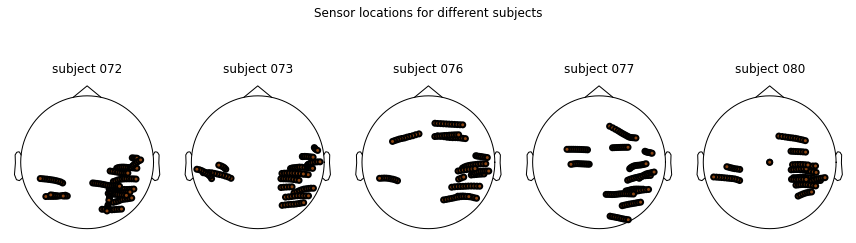

In [7]:
#plot the channel locations 
fig = plt.figure (figsize=(12,4))
gs = gridspec.GridSpec(1,5)
axes1 = np.array([[fig.add_subplot(gs[row, col]) for col in range(5)] for row in range(1)])

for ax, (sub, val) in zip(axes1.ravel(), raw_audi.items()):
    val.plot_sensors(axes=ax, show=False)
    ax.axes.xaxis.set_visible(False)
    ax.set_title('subject'+ ' '+ sub)
fig.suptitle("Sensor locations for different subjects")
fig.tight_layout()
fig.savefig("Sensor_audi.png")


#### Pick the channels in right hemisphere

In [8]:

from pathlib import Path
ch_picks = {}

for sub in subject: 
    for file_name in Path("ieeg_data_sample").glob(f"sub-{sub}/ieeg/*-MNI152*.tsv"):
        #sub = file_name.name.split("-")[1].split("_")[0]
        df = pd.read_csv(file_name, sep='\t', usecols=['name', 'x', 'y', 'z'])
        df = df[df.x > 0]
        ch_picks[sub] = df['name']
        ch_picks[sub] = [str(s) for s in ch_picks[sub]]
        #print(ch_picks[sub])
        #print(sub, len(ch_picks[sub]))

### Analysis of epoched data for task "AUDI"

In [9]:
# creating epochs for the events. The repeated events are dropped, only first is picked.
#fig, axes = plt.subplots(2, 5, figsize=(15, 10))

epochs_audi={}
for sub, r in raw_audi.items():
    events, event_id = mne.events_from_annotations(r)
    epochs_audi[sub] = mne.Epochs(r, events, event_id, detrend=1, baseline=None, event_repeated='drop', picks=ch_picks[sub])
    #epochs_audi[sub].plot_psd()
    #epochs_audi[sub].plot_psd_topomap()

Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Not setting metadata
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1006 matching events found
No baseline correction applied
0 projection items activated
Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Not setting metadata
Not setting metadata
999 matching events found
No baseline correction applied
0 projection items activated
Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Not setting metadata
Not 

In [10]:
epochs_audi['072']

<Epochs |  1006 events (good & bad), -0.203125 - 0.5 sec, baseline off, ~172 kB, data not loaded,
 '1': 60
 '10': 60
 '100': 165
 '101': 3
 '102': 3
 '103': 3
 '104': 3
 '105': 3
 '106': 3
 '107': 3
 '108': 3
 '109': 3
 '11': 60
 '110': 3
 '111': 3
 '112': 3
 '12': 60
 '2': 60
 '20': 60
 '3': 59
 '4': 60
 '5': 60
 '51': 23
 '6': 60
 '7': 60
 '8': 60
 '9': 60
 '99': 3>

In [11]:
epochs_audi['072'][0]

<Epochs |  1 events (good & bad), -0.203125 - 0.5 sec, baseline off, ~172 kB, data not loaded,
 '51': 1>

### log10(PSD) distribution for frequency band gamma -- 25 to 32 Hz of epoched data --- task(AUDI)

In [12]:
fmin, fmax = 25.0, 32.0
psds_audi={}

#finding average PSD for the gamma band for each epoch for each subject
for sub, val in epochs_audi.items():
    psds_audi_arr = []
    for i in range(len(epochs_audi[sub].events)):
        psds, freqs = mne.time_frequency.psd_multitaper(val[i], fmin=fmin, fmax=fmax)
        x = np.log10(psds.T.mean(0).mean(0))# first average accross freq and then average across channels  
        print('-----', x)
        psds_audi_arr.append(x)   
    psds_audi[sub] = psds_audi_arr

Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.39917662]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.65198612]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.75500647]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.57848822]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.52387489]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.64171794]
Loading data for 1 events and 46 original time

In [13]:
len(psds_audi['072'])

1006

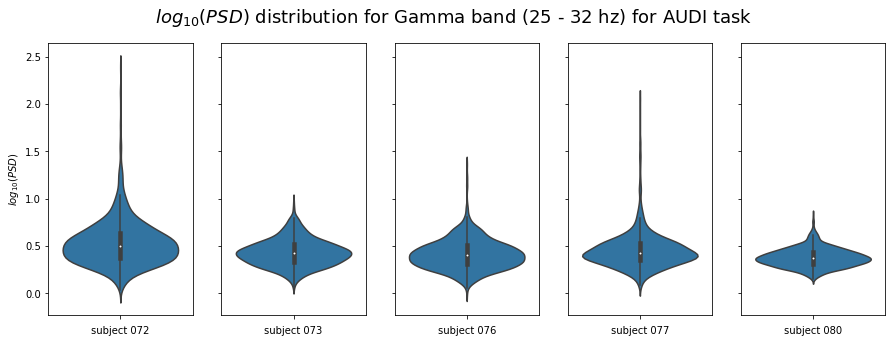

In [14]:

fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey = True)

for ax, (sub, val) in zip (axes.ravel(), psds_audi.items()):
    sns.violinplot(y=np.array(psds_audi[sub]).ravel(), ax=ax)
    ax.set_xlabel('subject ' + sub)

    
axes[0].set_ylabel('$log_{10}(PSD)$')
    
fig.suptitle('$log_{10}(PSD)$ distribution for Gamma band (25 - 32 hz) for AUDI task', fontsize=18)
fig.savefig("Violinplot_Audi.png")

#### The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes.

In [15]:
#unravelled the psd array using as the test works on 1-d array only
import scipy
stat, pvalue = scipy.stats.kruskal(np.array(psds_audi['072']).ravel(), np.array(psds_audi['073']).ravel(), 
                                   np.array(psds_audi['076']).ravel(), np.asarray(psds_audi['077']).ravel(), 
                                   np.array(psds_audi['080']).ravel())
print(stat)
print("{:.2e}".format(pvalue))
                                                                     

350.2004456966606
1.59e-74


Since pvalue <.05, we reject the null hypothesis that the median value of psd is same for all subjects

In [16]:
epochs_audi['072'].to_data_frame()

Loading data for 1006 events and 46 original time points ...
0 bad epochs dropped


time condition  epoch            A2            A3            A4  \
0      -203        51      0  -9361.143206  43054.594500  11635.273929   
1      -188        51      0  -6241.618623  36032.570187   8171.244521   
2      -172        51      0  -2926.789169  28033.960486   4707.215113   
3      -156        51      0    290.391664  19254.093155   1438.505835   
4      -141        51      0   3116.932238   9692.968194  -1146.602064   
...     ...       ...    ...           ...           ...           ...   
46271   438        51   1006 -14745.308549 -17634.162182  -8125.909784   
46272   453        51   1006 -10493.068190 -19975.568072 -10567.757036   
46273   469        51   1006    204.583851 -21731.028832 -12814.299418   
46274   484        51   1006  10413.947012 -23291.177093 -14963.177920   
46275   500        51   1006  19060.787286 -24753.661474 -17112.056422   

                 A5           A6            A7            A8  ...  \
0      -4981.990885  4904.660453  18402.028326   1527.836255  ...   
1      -4107.631338  1953.105891  15732.053435  -2111.134249  ...   
2      -3526.240541  -998.448670  12573.797293  -1941.449969  ...   
3      -3433.146253 -3754.683103   9220.228651   1939.225217  ...   
4      -4218.965845 -6315.605036   7136.206519   6503.501783  ...   
...             ...          ...           ...           ...  ...   
46271   5754.853436  3362.595243  12259.575468   4765.907084  ...   
46272   7772.128092  2848.934287  21582.579114  11446.792289  ...   
46273   9496.426369  1163.375442  29343.052242  17248.748356  ...   
46274  10732.435766 -1303.441033  35248.048990  21683.501665  ...   
46275  11284.843784 -4453.858886  38906.890954  24458.068205  ...   

                 Z4             Z5            Z6            Z7            Z8  \
0      33316.196823   33180.235955  38746.908811 -10180.706310  -2707.404455   
1      23268.959830   33122.871092  31511.447648 -13285.332840  -5072.868028   
2      14491.269346   32186.584720  22908.791357 -15022.748981  -6950.038906   
3       7373.765629   30273.720589  13622.526056 -15490.614799  -8436.580970   
4       2893.018809   27384.278700   5898.783644 -14395.953914  -9825.466784   
...             ...            ...           ...           ...           ...   
46271  -5636.971501  -15135.525628  -1115.225404   4086.536013   4305.942659   
46272  10469.755831   14572.012826   3667.557321    870.244037  13807.234660   
46273  27357.756051   46428.026927   7766.738666  -3224.961818  21941.316273   
46274  44343.404892   77502.775770  11084.654753  -8589.721811  28122.234739   
46275  60547.803732  106429.041336  13426.000710 -14931.067192  32154.685187   

               Z11           Z12           Z13           Z14           Z15  
0      1456.828305    395.868780 -13936.868733   7630.853443   7628.507379  
1       254.532048    616.805582 -10105.129140  12811.208012  13260.832397  
2     -1045.420459    740.086135  -5492.124289  16233.719563  17232.978277  
3     -2150.060466    668.046559  -1367.408317  17898.395727  19642.593639  
4     -2961.724094    303.038232   1683.073646  17609.916372  20392.029863  
...            ...           ...           ...           ...           ...  
46271 -2083.741205 -24090.082999 -17860.747856 -10915.602242  -8416.842949  
46272 -1513.347909 -19977.463583 -11307.125122 -13657.323826  -7063.136644  
46273 -1626.548363 -16255.484426  -4460.526008 -11516.148986  -6881.320599  
46274 -2618.670326 -12435.833760   3069.682114   1465.029822  -7480.769812  
46275 -4685.041556  -8616.190724  10795.202737  14641.521129  -8470.844025  

[46276 rows x 118 columns]

### Comparing evoked data of all subjects

In [17]:
#https://mne.tools/stable/generated/mne.EvokedArray.html#mne.EvokedArray.plot_joint

   

072


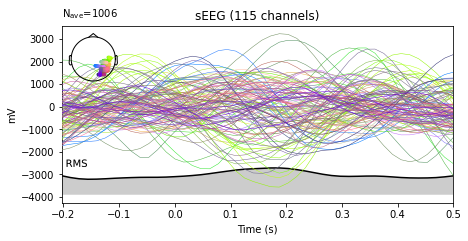

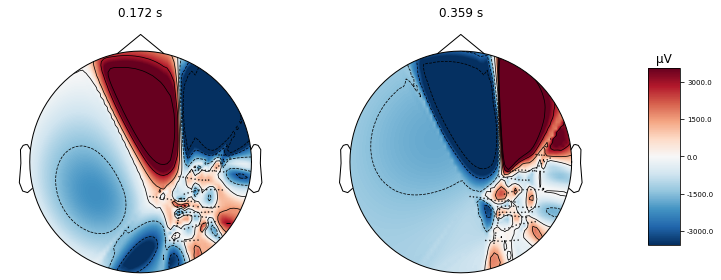

073


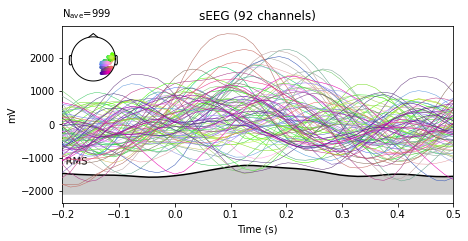

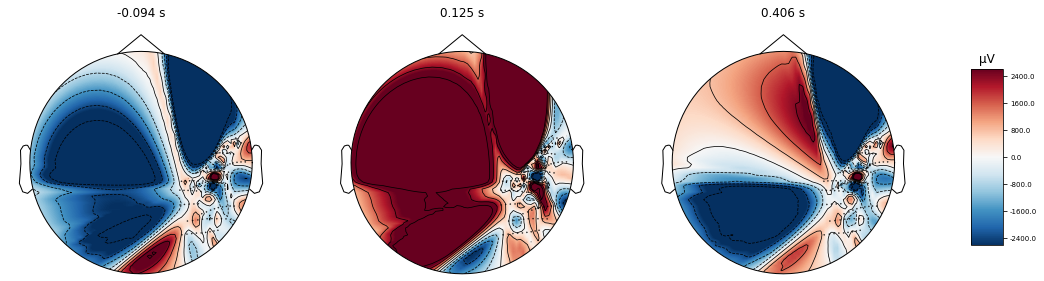

076


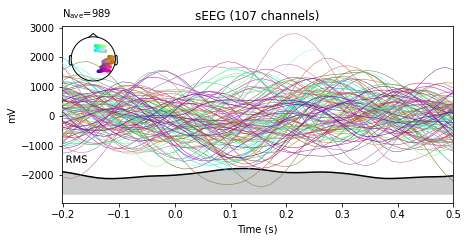

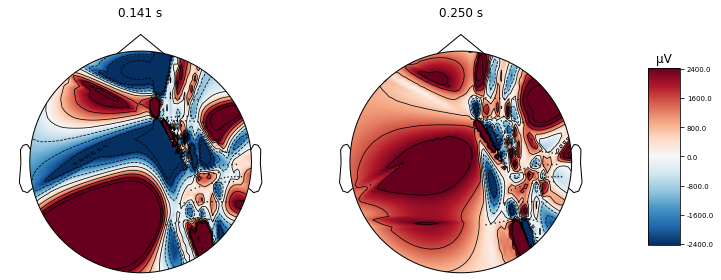

077


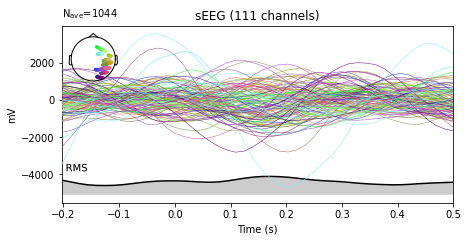

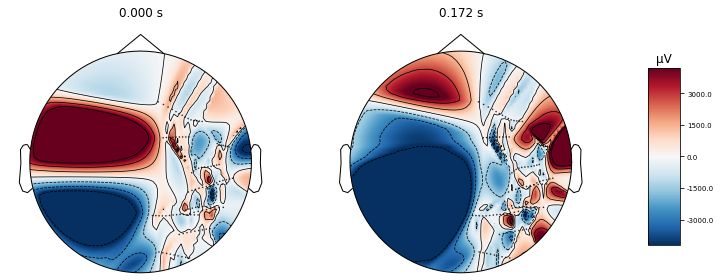

080


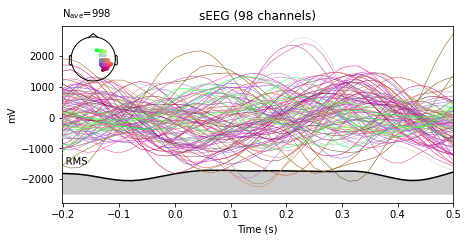

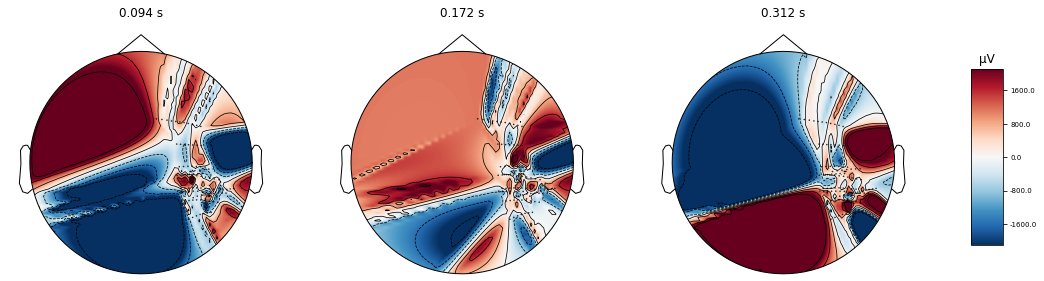

In [11]:
  
evoked_audi = {}
for sub, val in epochs_audi.items():
    print(sub)
    evoked_audi[sub] = epochs_audi[sub].average()
    evoked_audi[sub].plot(exclude='bads', spatial_colors=True, gfp=True)  
    evoked_audi[sub].plot_topomap(times='peaks', size=3, units='µV')

In [12]:
evoked_audi['072'].to_data_frame()

time           A2           A3           A4           A5          A6  \
0   -203  1023.146894  1122.894573  1306.663422  -856.631045 -801.074114   
1   -188  1424.028153   948.041607  1357.259035  -508.287811 -550.167367   
2   -172  1747.346108   743.483751  1331.067858  -137.131723 -281.010690   
3   -156  1887.774308   538.731688  1190.521983   176.458511  -20.687697   
4   -141  1807.744346   377.275095   999.497025   370.549134  252.060783   
5   -125  1531.622488   219.022016   735.859834   441.742537  522.285499   
6   -109  1105.421986    34.461683   457.369946   481.192484  738.730225   
7    -94   601.561438  -170.581891   142.282800   434.147920  865.574657   
8    -78    94.109151  -392.710349  -104.366343   374.581008  841.661049   
9    -62  -369.659213  -613.674153  -277.529410   387.529140  749.503764   
10   -47  -787.705186  -795.807618  -391.379573   468.235850  628.223734   
11   -31 -1219.341799  -945.421021  -493.192119   586.122410  433.749035   
12   -16 -1631.466178 -1046.496706  -591.704530   710.416052  131.423540   
13     0 -2007.769784 -1098.355211  -685.459879   837.913007 -185.948580   
14    16 -2341.554445 -1113.713508  -743.200718   905.223432 -431.096790   
15    31 -2609.425001 -1135.769736  -750.462072   954.574775 -614.796283   
16    47 -2748.573701 -1092.785698  -806.358260   876.757552 -747.045707   
17    62 -2757.058813 -1020.970438  -939.332310   674.101657 -793.772092   
18    78 -2530.913564  -830.820383 -1166.954617   390.096515 -717.600845   
19    94 -2118.771479  -565.242797 -1384.772223    12.704657 -601.240682   
20   109 -1679.157421  -269.086374 -1549.004519  -383.228143 -473.716689   
21   125 -1189.743530    21.245686 -1657.806696  -733.050353 -271.736075   
22   141  -675.090163   272.844433 -1704.189646 -1087.531872  -26.168492   
23   156  -278.092002   471.246010 -1593.795733 -1401.533474  141.447557   
24   172    47.555828   620.430376 -1347.399371 -1556.137033  187.039944   
25   188   316.414438   740.686387  -986.163033 -1536.005436  120.801567   
26   203   554.694388   820.559045  -551.343764 -1505.389352    7.675738   
27   219   775.112732   869.270595   -54.978604 -1466.424981 -104.770285   
28   234   988.444363   904.779741   394.499390 -1318.445011 -180.328120   
29   250  1179.837153   946.307692   790.294421 -1081.544227 -216.472931   
30   266  1370.938362  1003.464720  1051.834537  -790.281274 -246.405018   
31   281  1662.124566  1061.980930  1271.923285  -481.835797 -245.855463   
32   297  2013.302999  1017.694087  1407.265418  -228.432054 -180.071669   
33   312  2384.576329   922.151684  1459.511205   -30.555540  -27.405150   
34   328  2600.043643   775.450598  1446.036981   184.697625  144.676296   
35   344  2601.848289   595.258630  1338.884953   376.361294  300.546307   
36   359  2367.565758   448.557426  1188.825729   491.044420  453.018482   
37   375  1910.689619   313.214171   984.695658   536.124530  599.278041   
38   391  1280.242759   121.373219   734.551830   560.721926  688.845323   
39   406   560.195620   -97.552156   406.650718   486.981690  659.398675   
40   422  -139.660000  -332.009188    97.485074   391.108620  497.346816   
41   438  -784.959132  -565.107339  -165.860934   380.370216  295.494487   
42   453 -1344.152579  -771.703779  -348.731564   452.631539   97.427911   
43   469 -1848.983934  -942.867910  -497.140304   590.709693 -167.717645   
44   484 -2244.314272 -1036.954230  -609.631578   730.729634 -544.791038   
45   500 -2529.949524 -1072.795354  -692.223302   838.617297 -926.330010   

            A7          A8           A9          A10  ...           Z4  \
0    71.863851  -26.777843  -652.093983 -1166.844499  ...   362.476253   
1   165.797827   26.678327  -716.853847  -983.275808  ...   851.951002   
2   159.647416  -17.135105  -838.208616  -837.469216  ...  1284.248465   
3    76.807236 -143.559494  -978.978464  -748.742863  ...  1563.652374   
4     4.839997 -267.459749 -1092.567323  -736.705865  ...  17

# Analysis for task 'LEC2'

In [19]:
task = 'LEC2'
subject = ['072','073','076','077', '080']
suffix= 'ieeg'

raw_lec2 = {}
for sub in subject:
    bids_path = BIDSPath(subject=sub, task=task, acquisition = 'f8f24ds8sm0', suffix=suffix, root='iEEG_data_sample')
    raw_lec2[sub] = read_raw_bids(bids_path=bids_path, verbose=False)

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 15.016 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 15.016 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 15.016 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 15.016 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 15.016 (s)


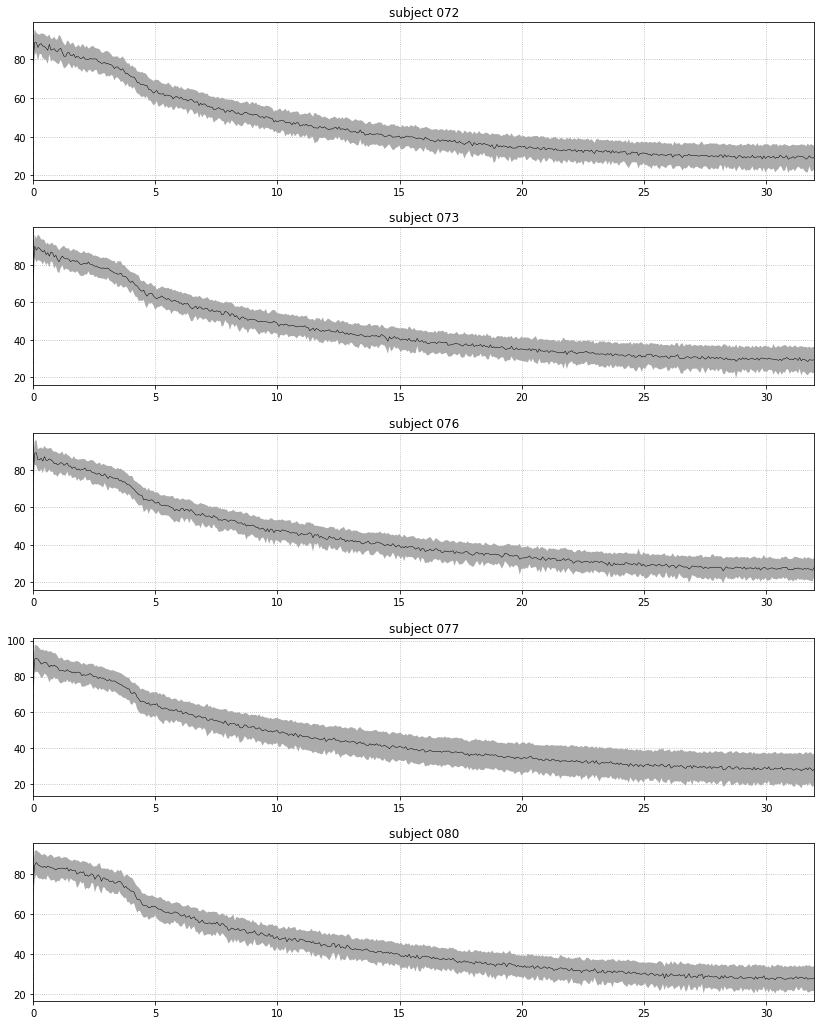

In [20]:
fig = plt.figure (figsize=(14,18))
gs = gridspec.GridSpec(5,1)
axes1 = np.array([[fig.add_subplot(gs[row, col]) for col in range(1)] for row in range(5)])

for ax, (sub, val) in zip(axes1.ravel(), raw_lec2.items()):
        val.plot_psd(proj=True, ax=ax, picks=ch_picks[sub], tmin=0, tmax = 15, 
             show=False, average=True)
        ax.set_title('subject'+ ' '+ sub)

Used Annotations descriptions: ['1', '10', '20', '99']
Not setting metadata
Not setting metadata
476 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1006 events and 46 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


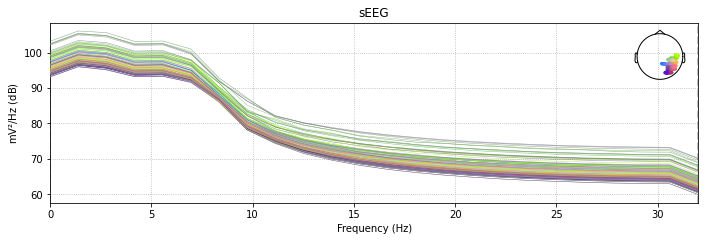

Loading data for 1006 events and 46 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


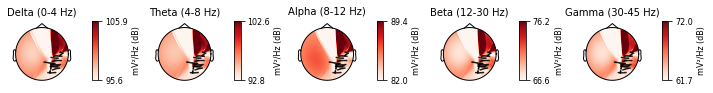

Used Annotations descriptions: ['1', '10', '20', '99']
Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
Loading data for 999 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


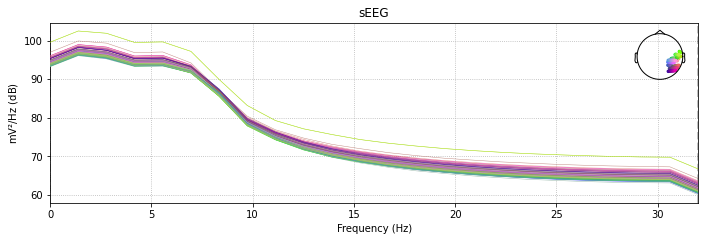

Loading data for 999 events and 46 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


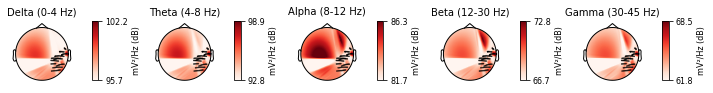

Used Annotations descriptions: ['1', '10', '20', '99']
Not setting metadata
Not setting metadata
470 matching events found
No baseline correction applied
0 projection items activated
Loading data for 989 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


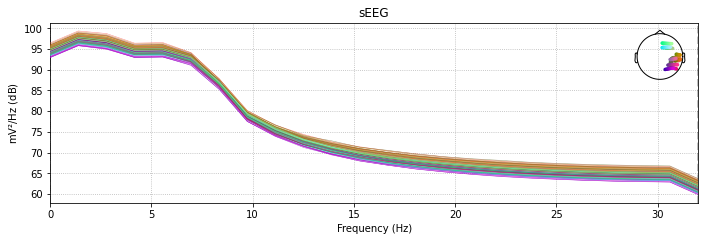

Loading data for 989 events and 46 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


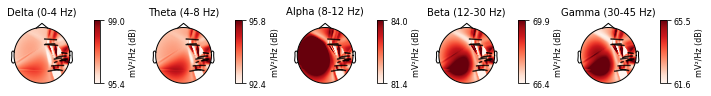

Used Annotations descriptions: ['1', '10', '20', '99']
Not setting metadata
Not setting metadata
466 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1044 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


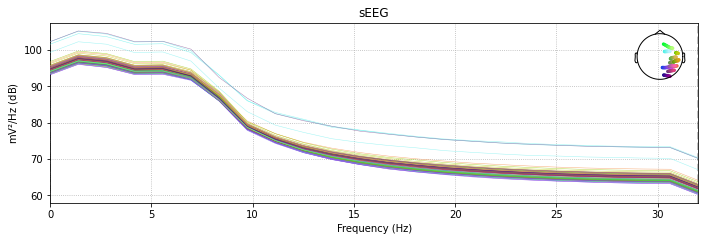

Loading data for 1044 events and 46 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


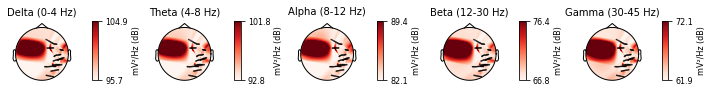

Used Annotations descriptions: ['1', '10', '20', '99']
Not setting metadata
Not setting metadata
411 matching events found
No baseline correction applied
0 projection items activated
Loading data for 998 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


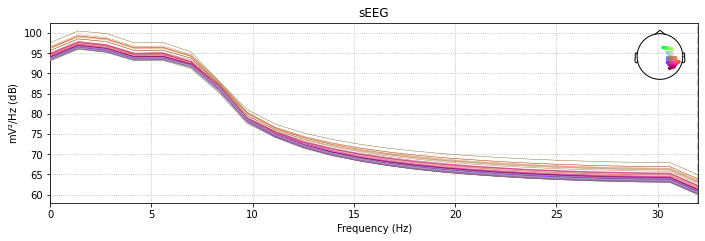

Loading data for 998 events and 46 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


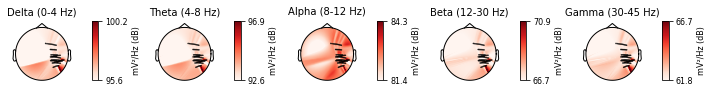

In [21]:
# Creating epoched data for the task LEC2
epochs_lec2={}
for sub, r in raw_lec2.items():
    events, event_id = mne.events_from_annotations(r)
    epochs_lec2[sub] = mne.Epochs(r, events, event_id, detrend=1, baseline=None, event_repeated='drop', picks=ch_picks[sub])
    epochs_audi[sub].plot_psd()
    epochs_audi[sub].plot_psd_topomap()

### log10(PSD) distribution for frequency band gamma -- 25 to 32 Hz of epoched data --- task(LEC2)

In [22]:
#finding average PSD for the gamma band for each epoch for each subject
psds_lec2 = {}
fmin, fmax = 25.0, 32.0

for sub, val in epochs_lec2.items():
    psds_lec2_arr = []
    for i in range(len(epochs_lec2[sub].events)):
        psds, freqs = mne.time_frequency.psd_multitaper(val[i], fmin=fmin, fmax=fmax)
        x = np.log10(psds.T.mean(0).mean(0))# first average accross freq and then average across channels  
        print('-----', x)
        psds_lec2_arr.append(x)   
    psds_lec2[sub] = psds_lec2_arr

Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.47247664]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.89801076]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.48927475]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.55479845]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.74457942]
Loading data for 1 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
----- [0.39163677]
Loading data for 1 events and 46 original time

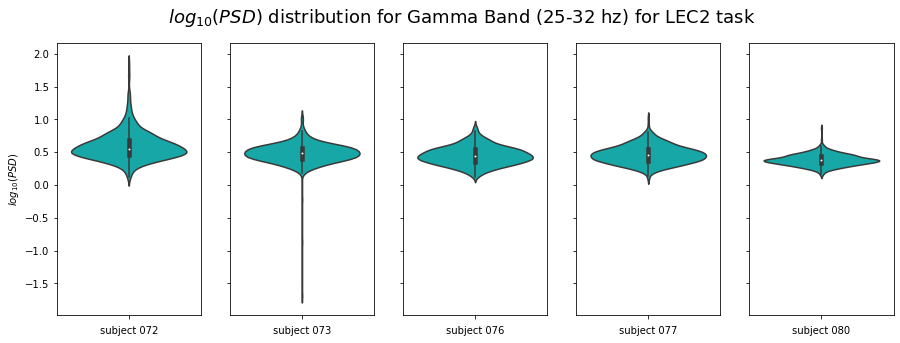

In [23]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(15, 5))

for ax, (sub, val) in zip (axes.ravel(), psds_lec2.items()):
    sns.violinplot(y= np.array(psds_lec2[sub]).ravel(), ax=ax, color='c')
    ax.set_xlabel('subject ' + sub)
    
axes[0].set_ylabel('$log_{10}(PSD)$')
fig.suptitle('$log_{10}(PSD)$ distribution for Gamma Band (25-32 hz) for LEC2 task', fontsize=18)
fig.savefig("Violinplot_Lec2.png")

#### Testing the hypothesis that there is no difference in the median PSD of the 5 subjects --- using Kruskal's test for non-parametric samples

In [24]:
import scipy
stat, pvalue = scipy.stats.kruskal(np.array(psds_lec2['072']).ravel(), np.array(psds_lec2['073']).ravel(), 
                                   np.array(psds_lec2['076']).ravel(), np.asarray(psds_lec2['077']).ravel(), 
                                   np.array(psds_lec2['080']).ravel())
print(stat)
print("{:.4e}".format(pvalue))
                                    


395.64165255361877
2.4320e-84


In [25]:
from scipy.stats import mannwhitneyu
stat1, p1 = mannwhitneyu(np.array(psds_audi['072']).ravel(), np.array(psds_lec2['072']).ravel())
stat2, p2 = mannwhitneyu(np.array(psds_audi['073']).ravel(), np.array(psds_lec2['073']).ravel())
stat3, p3 = mannwhitneyu(np.array(psds_audi['076']).ravel(), np.array(psds_lec2['076']).ravel())
stat4, p4 = mannwhitneyu(np.array(psds_audi['077']).ravel(), np.array(psds_lec2['077']).ravel())
stat5, p5 = mannwhitneyu(np.array(psds_audi['080']).ravel(), np.array(psds_lec2['080']).ravel())

In [26]:
print('p value for subject 072 for task AUDI and LEC2 is {:.3e}'.format(p1))
print('p value for subject 073 for task AUDI and LEC2 is {:.3e}'.format(p2))
print('p value for subject 076 for task AUDI and LEC2 is {:.3e}'.format(p3))
print('p value for subject 077 for task AUDI and LEC2 is {:.3e}'.format(p4))
print('p value for subject 080 for task AUDI and LEC2 is {:.3e}'.format(p5))

p value for subject 072 for task AUDI and LEC2 is 2.711e-10
p value for subject 073 for task AUDI and LEC2 is 1.833e-15
p value for subject 076 for task AUDI and LEC2 is 4.913e-07
p value for subject 077 for task AUDI and LEC2 is 3.878e-04
p value for subject 080 for task AUDI and LEC2 is 1.417e-01


In [27]:

evoked_lec2 = {}
for sub, val in epochs_audi.items():
    evoked_lec2[sub] = epochs_lec2[sub].average()
    #evoked_audi[sub].plot(picks=ch_picks[sub])  



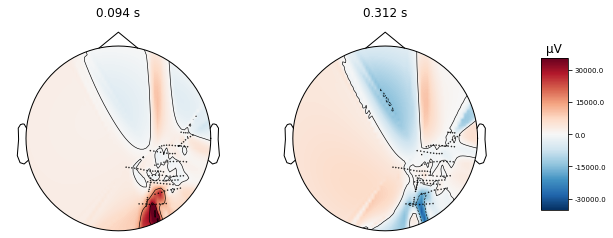

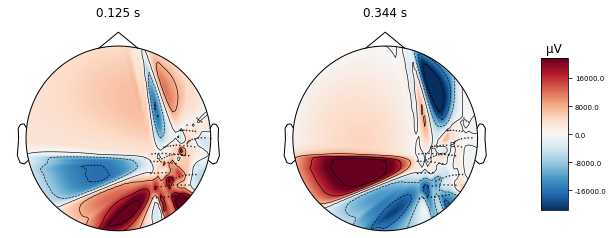

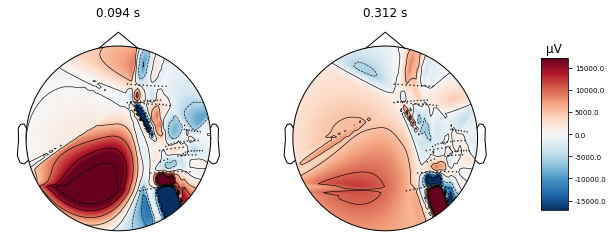

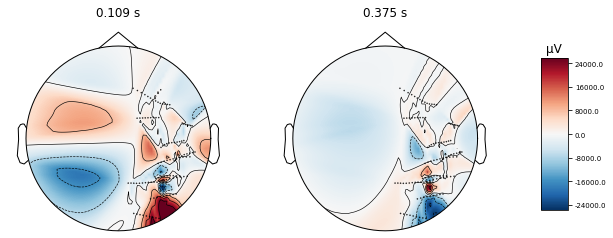

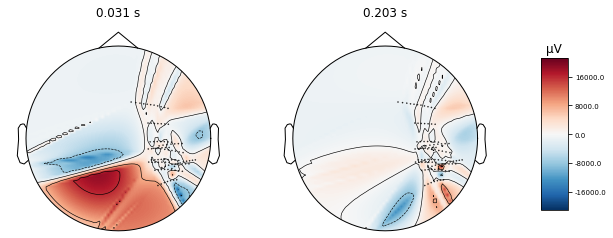

In [28]:
#%matplotlib inline

#Plots for heatmap
for sub, val in evoked_lec2.items():
    val.plot_topomap(times='peaks', size=2.5, units='µV')

No projector specified for this dataset. Please consider the method self.add_proj.


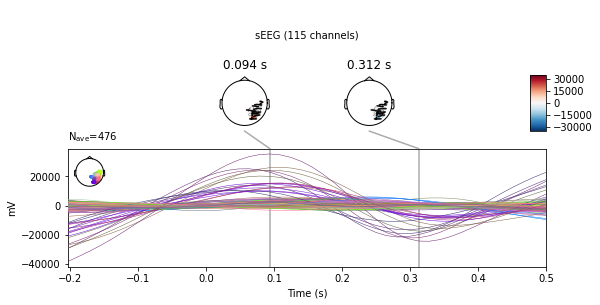

No projector specified for this dataset. Please consider the method self.add_proj.


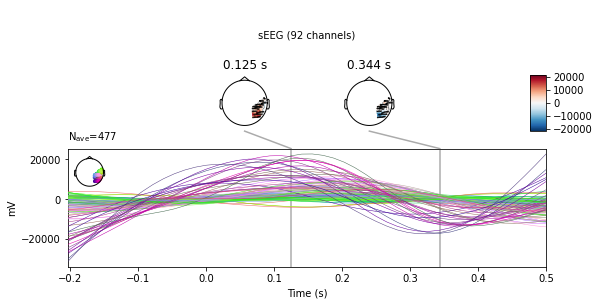

No projector specified for this dataset. Please consider the method self.add_proj.


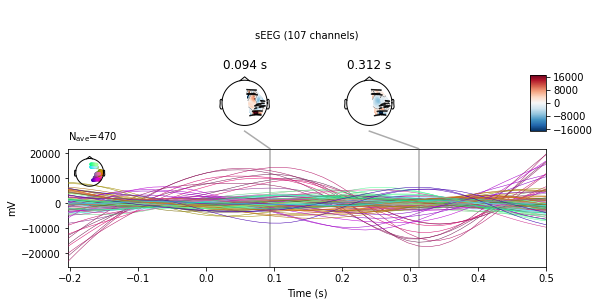

No projector specified for this dataset. Please consider the method self.add_proj.


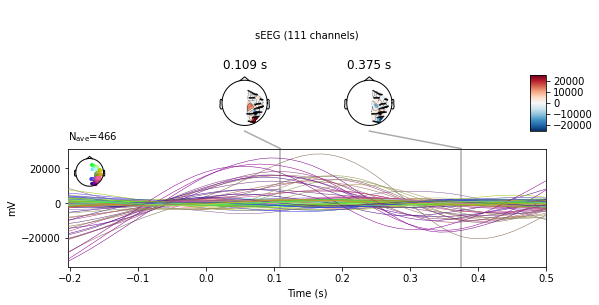

No projector specified for this dataset. Please consider the method self.add_proj.


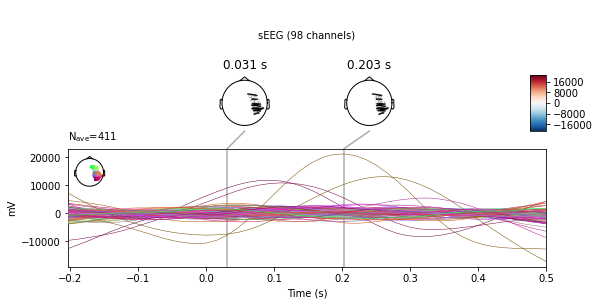

In [29]:
for ax, (sub, val) in zip (axes.ravel(), evoked_lec2.items()):
    fig = val.plot_joint()

Used Annotations descriptions: ['1', '10', '20', '99']
Used Annotations descriptions: ['1', '10', '20', '99']
Used Annotations descriptions: ['1', '10', '20', '99']
Used Annotations descriptions: ['1', '10', '20', '99']
Used Annotations descriptions: ['1', '10', '20', '99']


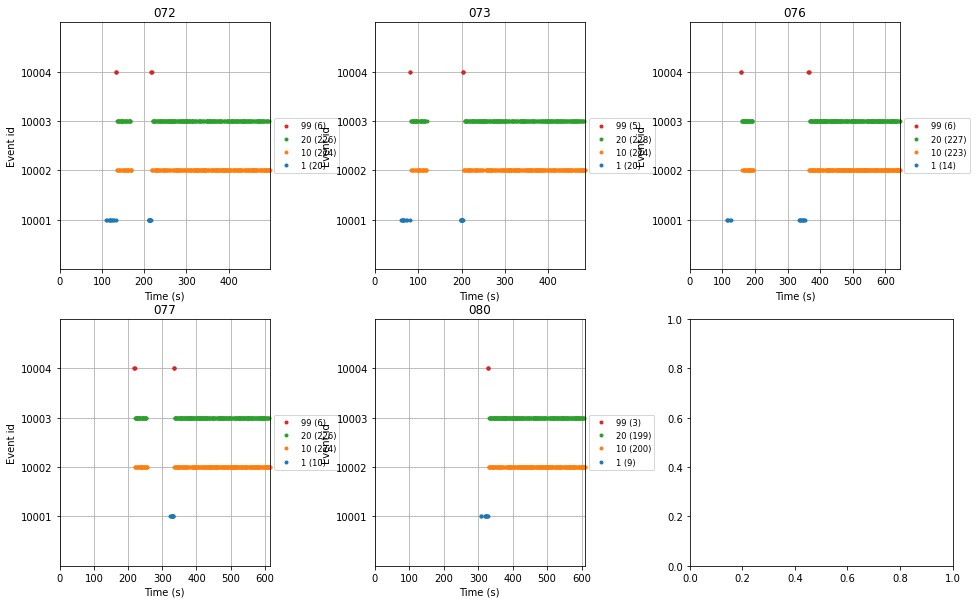

In [30]:
fig, axs = plt.subplots(2,3, figsize = (16,10))

for ax, (sub, val) in zip(axs.ravel(), raw_lec2.items()):
    events, event_id = mne.events_from_annotations(val)
    ax.set_title(sub)
    mne.viz.plot_events(events, event_id=event_id, sfreq=val.info['sfreq'],axes=ax,
                          first_samp=val.first_samp, show=False)

Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '

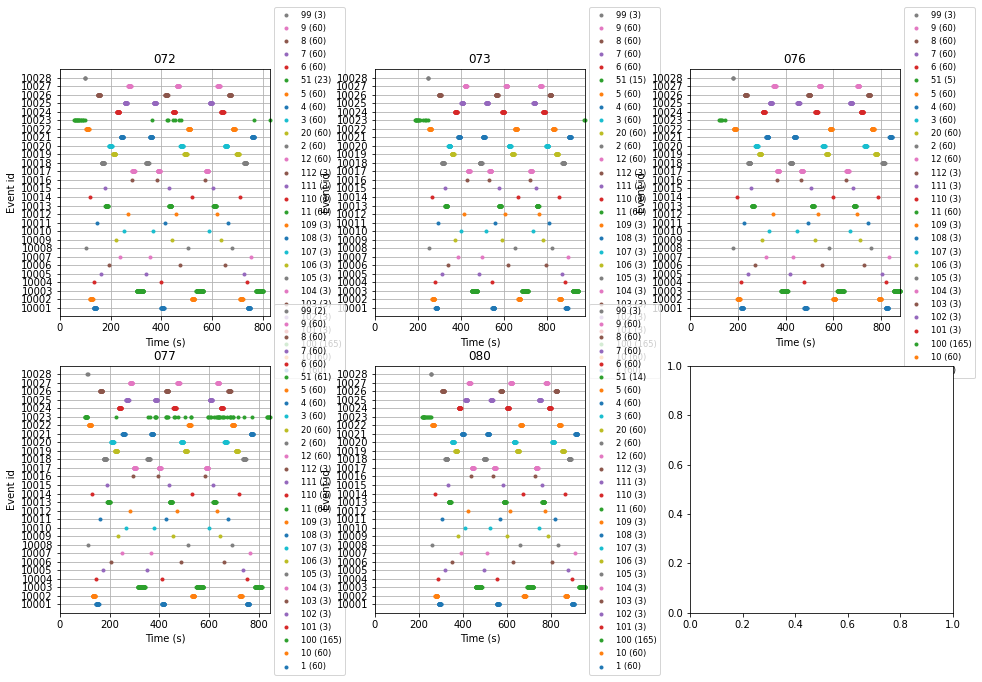

In [31]:
fig, axs = plt.subplots(2,3, figsize = (16,10))

for ax, (sub, val) in zip(axs.ravel(), raw_audi.items()):
    events, event_id = mne.events_from_annotations(val)
    ax.set_title(sub)
    mne.viz.plot_events(events, event_id=event_id, sfreq=val.info['sfreq'],axes=ax,
                          first_samp=val.first_samp, show=False)

Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Not setting metadata
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1006 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1006 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Not setting metadata
Not setting metadata
999 matching events found
No baseline correction applied
0 projection items activated
Loading data for 999 events and 46 original time points ...
0 bad epochs dropped
    U

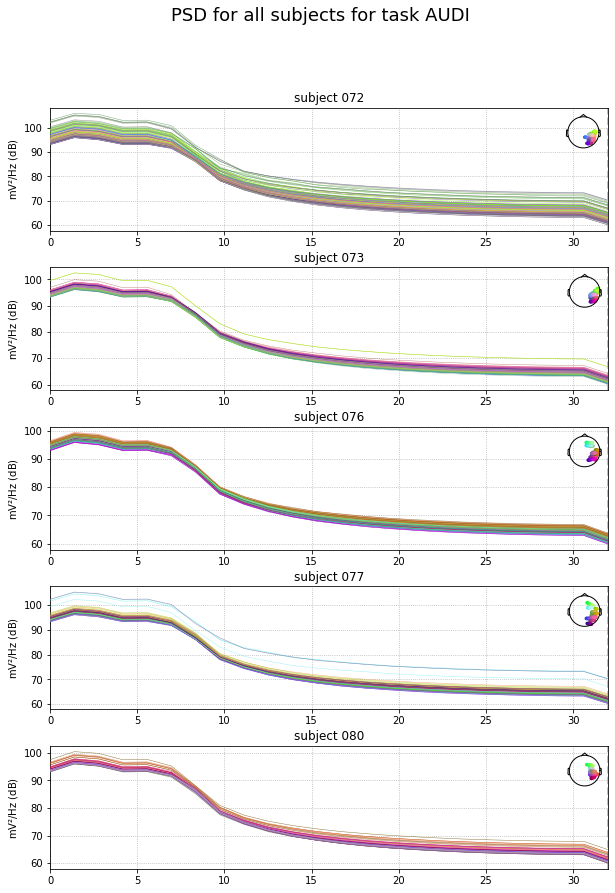

In [32]:
fig, axs = plt.subplots(5, figsize = (10,14))

for ax, (sub,val2) in zip(axs.ravel(), raw_audi.items()):
    events2, event_id2 = mne.events_from_annotations(val2)
    epochs_audi[sub] = mne.Epochs(val2, events2, event_id2, detrend=1, baseline=None, event_repeated='drop', picks=ch_picks[sub])
    epochs_audi[sub].plot_psd(ax=ax, show=False)
    ax.set_title('subject'+ ' '+ sub)                        
fig.suptitle("PSD for all subjects for task AUDI", fontsize=18)
fig.savefig("PSD_AUDI.png")
    
    


Used Annotations descriptions: ['1', '10', '20', '99']
Not setting metadata
Not setting metadata
476 matching events found
No baseline correction applied
0 projection items activated
Loading data for 476 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Used Annotations descriptions: ['1', '10', '20', '99']
Not setting metadata
Not setting metadata
477 matching events found
No baseline correction applied
0 projection items activated
Loading data for 477 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Used Annotations descriptions: ['1', '10', '20', '99']
Not setting metadata
Not setting metadata
470 matching events found
No baseline correction applied
0 projection items activated
Loading data for 470 events and 46 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Used Annotations descript

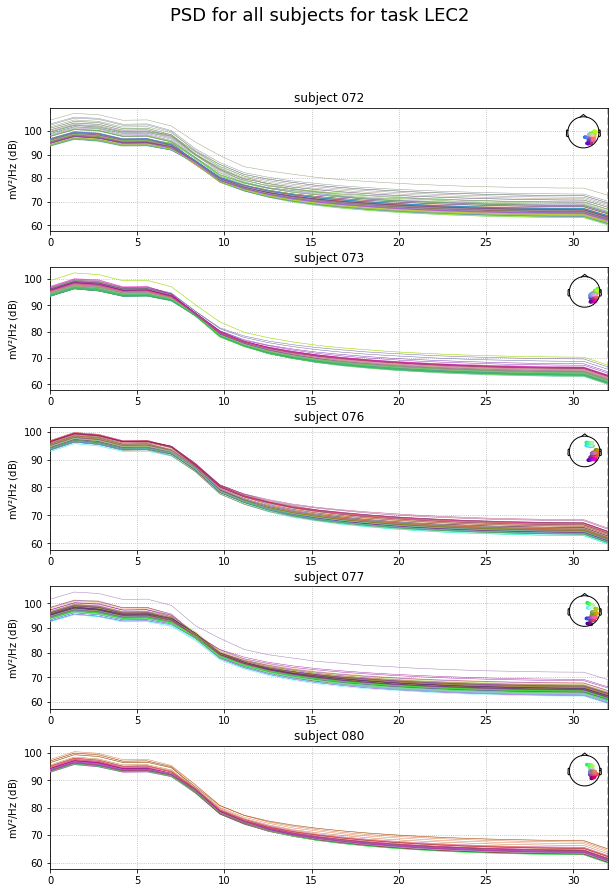

In [33]:
epochs_lec2={}
fig, axs = plt.subplots(5, figsize = (10,14))

for ax, (sub,val2) in zip(axs.ravel(), raw_lec2.items()):
    events2, event_id2 = mne.events_from_annotations(val2)
    epochs_lec2[sub] = mne.Epochs(val2, events2, event_id2, detrend=1, baseline=None, event_repeated='drop', picks=ch_picks[sub])
    epochs_lec2[sub].plot_psd(ax=ax, show=False)
    ax.set_title('subject'+ ' '+ sub)                        
fig.suptitle("PSD for all subjects for task LEC2", fontsize=18)
fig.savefig("PSD_LEC2.png")

    

In [34]:
events_lec2_crop = mne.events_from_annotations(raw_lec2['076'].crop(tmin = 150, tmax=200))

Used Annotations descriptions: ['10', '20', '99']


Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['1', '10', '20', '99']


No handles with labels found to put in legend.


Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['1', '10', '20', '99']


No handles with labels found to put in legend.


Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['10', '20', '99']


No handles with labels found to put in legend.


Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['1', '10', '20', '99']


No handles with labels found to put in legend.


Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '12', '2', '20', '3', '4', '5', '51', '6', '7', '8', '9', '99']
Used Annotations descriptions: ['1', '10', '20', '99']


No handles with labels found to put in legend.


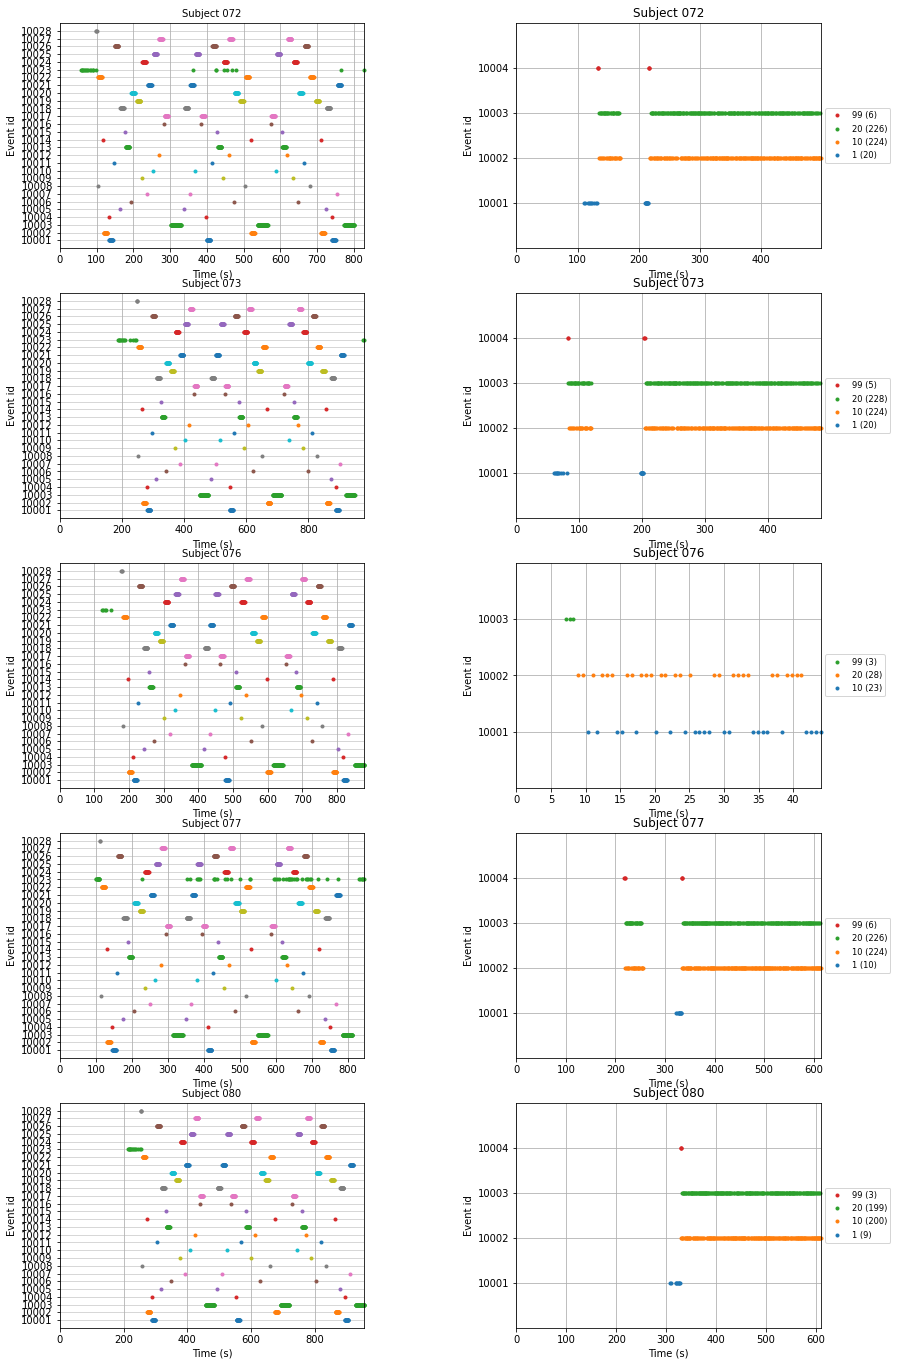

In [35]:
fig, axs = plt.subplots(5, 2, figsize=(15,24))

for i, (sub, val1), (sub, val2) in zip(range(5), raw_audi.items(), raw_lec2.items()):
    events1, event_id1 = mne.events_from_annotations(val1)
    events2, event_id2 = mne.events_from_annotations(val2)
  
    mne.viz.plot_events(events1, event_id=event_id1, sfreq=val1.info['sfreq'],axes=axs[i,0],
                          first_samp=val1.first_samp, show=False)
    axs[i,0].set_title('Subject '+sub, fontsize=10)
    axs[i,0].legend().set_visible(False)
    #axs[i,0].set_yticks(y[::2])
    axs[i,0].grid(axis="y", linewidth=.5)
    
    mne.viz.plot_events(events2, event_id=event_id2, sfreq=val2.info['sfreq'],axes=axs[i,1],
                          first_samp=val2.first_samp, show=False)
    axs[i,1].set_title('Subject '+sub)
fig.savefig("Events.png")
   

#### Comparison of ERP for all subjects using evoked object

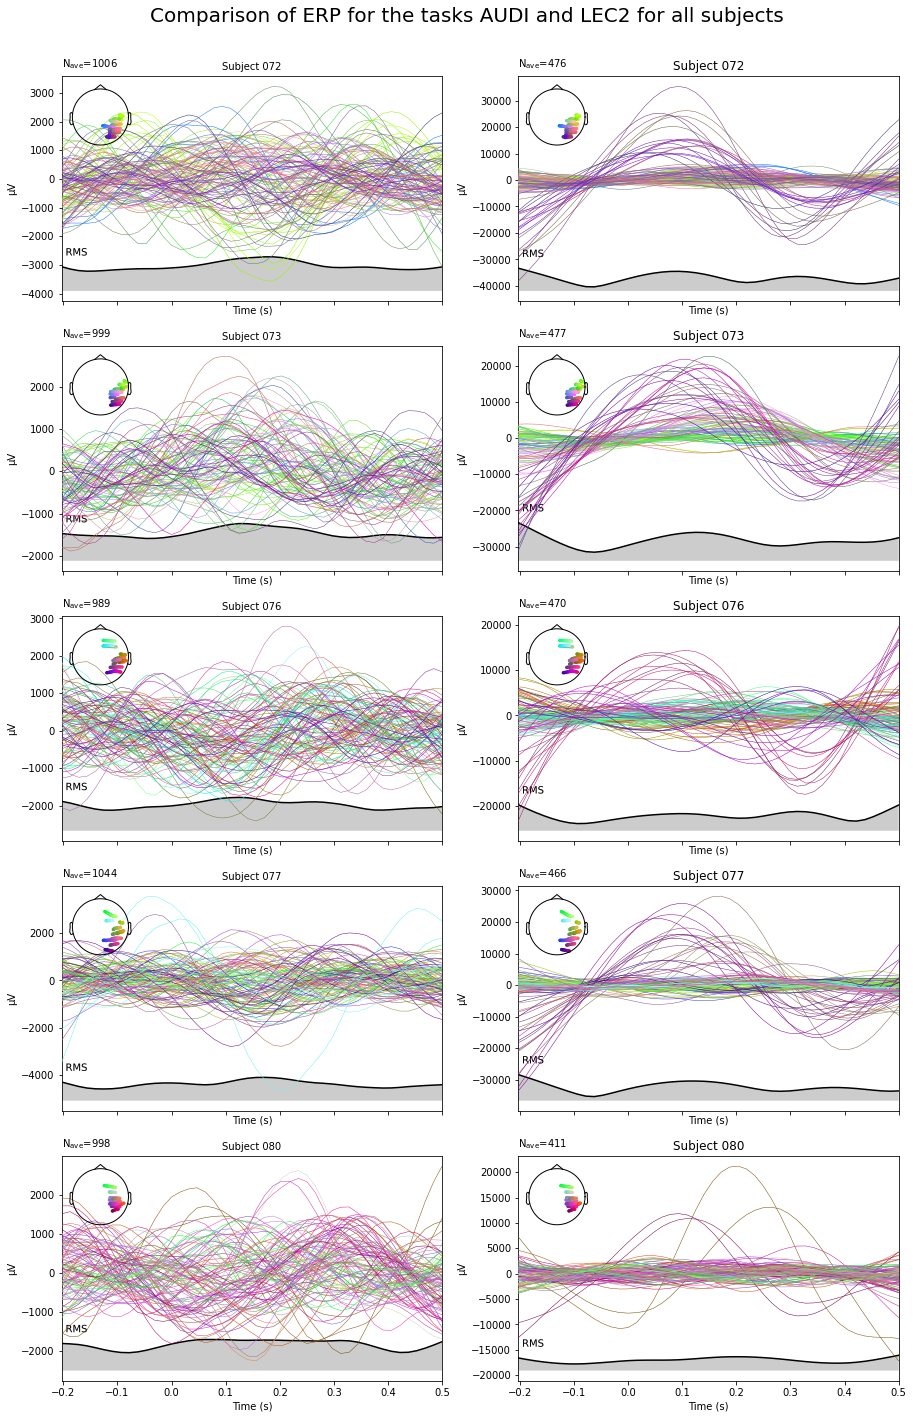

In [36]:
fig, axs = plt.subplots(5, 2, figsize=(15,24), sharex=True)

for i, (sub, val1), (sub, val2) in zip(range(5), raw_audi.items(), raw_lec2.items()):
    evoked_audi[sub].plot(exclude='bads', spatial_colors=True, gfp=True, axes=axs[i,0], units='µV', show=False) 
    axs[i,0].set_title('Subject '+sub, fontsize=10)
    
    evoked_lec2[sub].plot(exclude='bads', spatial_colors=True, gfp=True, axes=axs[i,1], units='µV', show=False) 
    axs[i,1].set_title('Subject '+sub)
fig.suptitle("Comparison of ERP for the tasks AUDI and LEC2 for all subjects", y = .92, fontsize=20)
fig.savefig('ERP_AUDI_LEC2.png')

#### convert evoked data to dataframe

In [37]:
df_lec2_072 = evoked_lec2['072'].to_data_frame(long_format=True)
df_lec2_072 = df_lec2_072[df_lec2_072.time > 0]

print(df_lec2_072.shape)
df_lec2_072.head()

Converting "channel" to "category"...
Converting "ch_type" to "category"...
(3680, 4)


time channel ch_type        value
1610    16      A2    seeg  -712.502496
1611    16      A3    seeg   303.758037
1612    16      A4    seeg  1169.824223
1613    16      A5    seeg  1201.207527
1614    16      A6    seeg  1860.130576

In [38]:
df_lec2_evoked = df_lec2_072.groupby(['time', 'channel']).mean()
df_lec2_evoked

value
time channel             
16   A10      -654.851277
     A11      -315.917351
     A12      -406.526435
     A2       -712.502496
     A3        303.758037
...                   ...
500  Z4      -2014.458567
     Z5      -2393.408970
     Z6       -999.967277
     Z7      -1464.598155
     Z8       2912.113113

[3680 rows x 1 columns]

#### convert epoched data to dataframe

In [39]:
df_epoch_072 = epochs_lec2['072'].to_data_frame(long_format=True)
#df_epoch_072 = df_epoch_072[df_lec2_072.time > 0]

Loading data for 476 events and 46 original time points ...
Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


In [40]:
df_1 = df_epoch_072[df_epoch_072.condition=='10']
df_2 = df_epoch_072[df_epoch_072.condition=='20']

In [41]:
df = df_1.groupby('epoch').mean().reset_index()
df1 = df_2.groupby('epoch').mean().reset_index()

In [42]:
df

epoch        time         value
0       0         NaN           NaN
1       1         NaN           NaN
2       2         NaN           NaN
3       3         NaN           NaN
4       4         NaN           NaN
..    ...         ...           ...
471   471  148.434783 -1.803146e-11
472   472  148.434783 -1.529859e-11
473   473         NaN           NaN
474   474  148.434783 -1.580836e-11
475   475  148.434783 -1.553809e-11

[476 rows x 3 columns]

[]

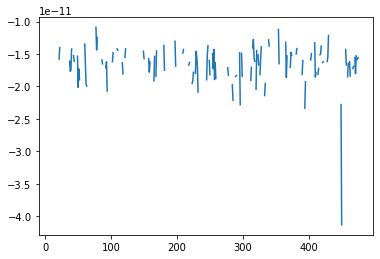

In [43]:
plt.plot(df.epoch, df.value)
plt.plot()

In [44]:
df

epoch        time         value
0       0         NaN           NaN
1       1         NaN           NaN
2       2         NaN           NaN
3       3         NaN           NaN
4       4         NaN           NaN
..    ...         ...           ...
471   471  148.434783 -1.803146e-11
472   472  148.434783 -1.529859e-11
473   473         NaN           NaN
474   474  148.434783 -1.580836e-11
475   475  148.434783 -1.553809e-11

[476 rows x 3 columns]

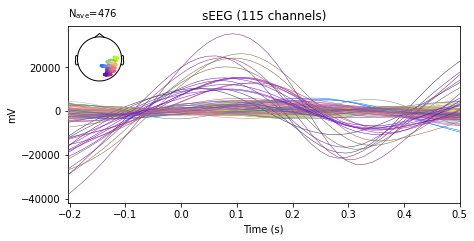

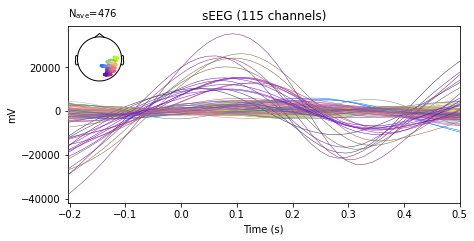

In [50]:
evoked_lec2['072'].plot(spatial_colors=True)

In [ ]:
evoked_lec2['']